In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection , metrics
from sklearn import preprocessing

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('survey lung cancer.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [3]:
#Check for Duplicates
dataset.duplicated().sum()

33

In [4]:
#Drop Duplicates
dataset=dataset.drop_duplicates()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

In [6]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
##Making all 0s and 1s
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
dataset['GENDER']=le.fit_transform(dataset['GENDER'])
dataset['LUNG_CANCER']=le.fit_transform(dataset['LUNG_CANCER'])
dataset['SMOKING']=le.fit_transform(dataset['SMOKING'])
dataset['YELLOW_FINGERS']=le.fit_transform(dataset['YELLOW_FINGERS'])
dataset['ANXIETY']=le.fit_transform(dataset['ANXIETY'])
dataset['PEER_PRESSURE']=le.fit_transform(dataset['PEER_PRESSURE'])
dataset['CHRONIC DISEASE']=le.fit_transform(dataset['CHRONIC DISEASE'])
dataset['FATIGUE ']=le.fit_transform(dataset['FATIGUE '])
dataset['ALLERGY ']=le.fit_transform(dataset['ALLERGY '])
dataset['WHEEZING']=le.fit_transform(dataset['WHEEZING'])
dataset['ALCOHOL CONSUMING']=le.fit_transform(dataset['ALCOHOL CONSUMING'])
dataset['COUGHING']=le.fit_transform(dataset['COUGHING'])
dataset['SHORTNESS OF BREATH']=le.fit_transform(dataset['SHORTNESS OF BREATH'])
dataset['SWALLOWING DIFFICULTY']=le.fit_transform(dataset['SWALLOWING DIFFICULTY'])
dataset['CHEST PAIN']=le.fit_transform(dataset['CHEST PAIN'])
dataset['LUNG_CANCER']=le.fit_transform(dataset['LUNG_CANCER'])

In [8]:
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


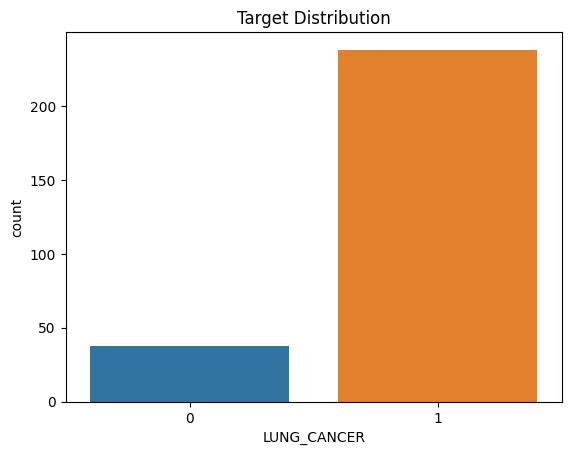

In [9]:
sns.countplot(x='LUNG_CANCER', data=dataset,)
plt.title('Target Distribution');

In [10]:
# function for plotting
def plot(col, dataset=dataset):
    return dataset.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<AxesSubplot: xlabel='GENDER'>

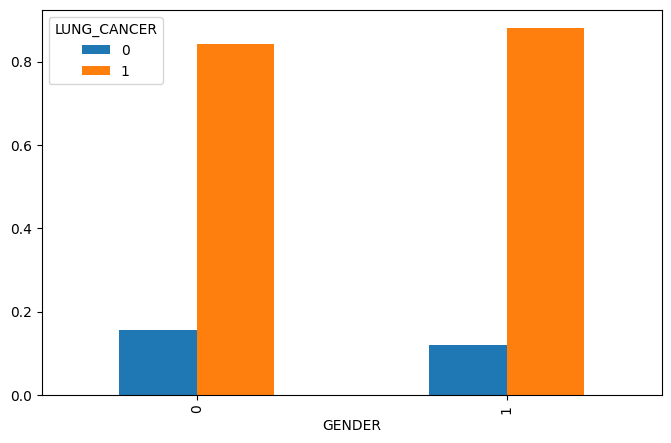

In [11]:
plot('GENDER')

In [12]:
dataset['LUNG_CANCER'].value_counts()

1    238
0     38
Name: LUNG_CANCER, dtype: int64

array([[<AxesSubplot: title={'center': 'GENDER'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'SMOKING'}>,
        <AxesSubplot: title={'center': 'YELLOW_FINGERS'}>],
       [<AxesSubplot: title={'center': 'ANXIETY'}>,
        <AxesSubplot: title={'center': 'PEER_PRESSURE'}>,
        <AxesSubplot: title={'center': 'CHRONIC DISEASE'}>,
        <AxesSubplot: title={'center': 'FATIGUE '}>],
       [<AxesSubplot: title={'center': 'ALLERGY '}>,
        <AxesSubplot: title={'center': 'WHEEZING'}>,
        <AxesSubplot: title={'center': 'ALCOHOL CONSUMING'}>,
        <AxesSubplot: title={'center': 'COUGHING'}>],
       [<AxesSubplot: title={'center': 'SHORTNESS OF BREATH'}>,
        <AxesSubplot: title={'center': 'SWALLOWING DIFFICULTY'}>,
        <AxesSubplot: title={'center': 'CHEST PAIN'}>,
        <AxesSubplot: title={'center': 'LUNG_CANCER'}>]], dtype=object)

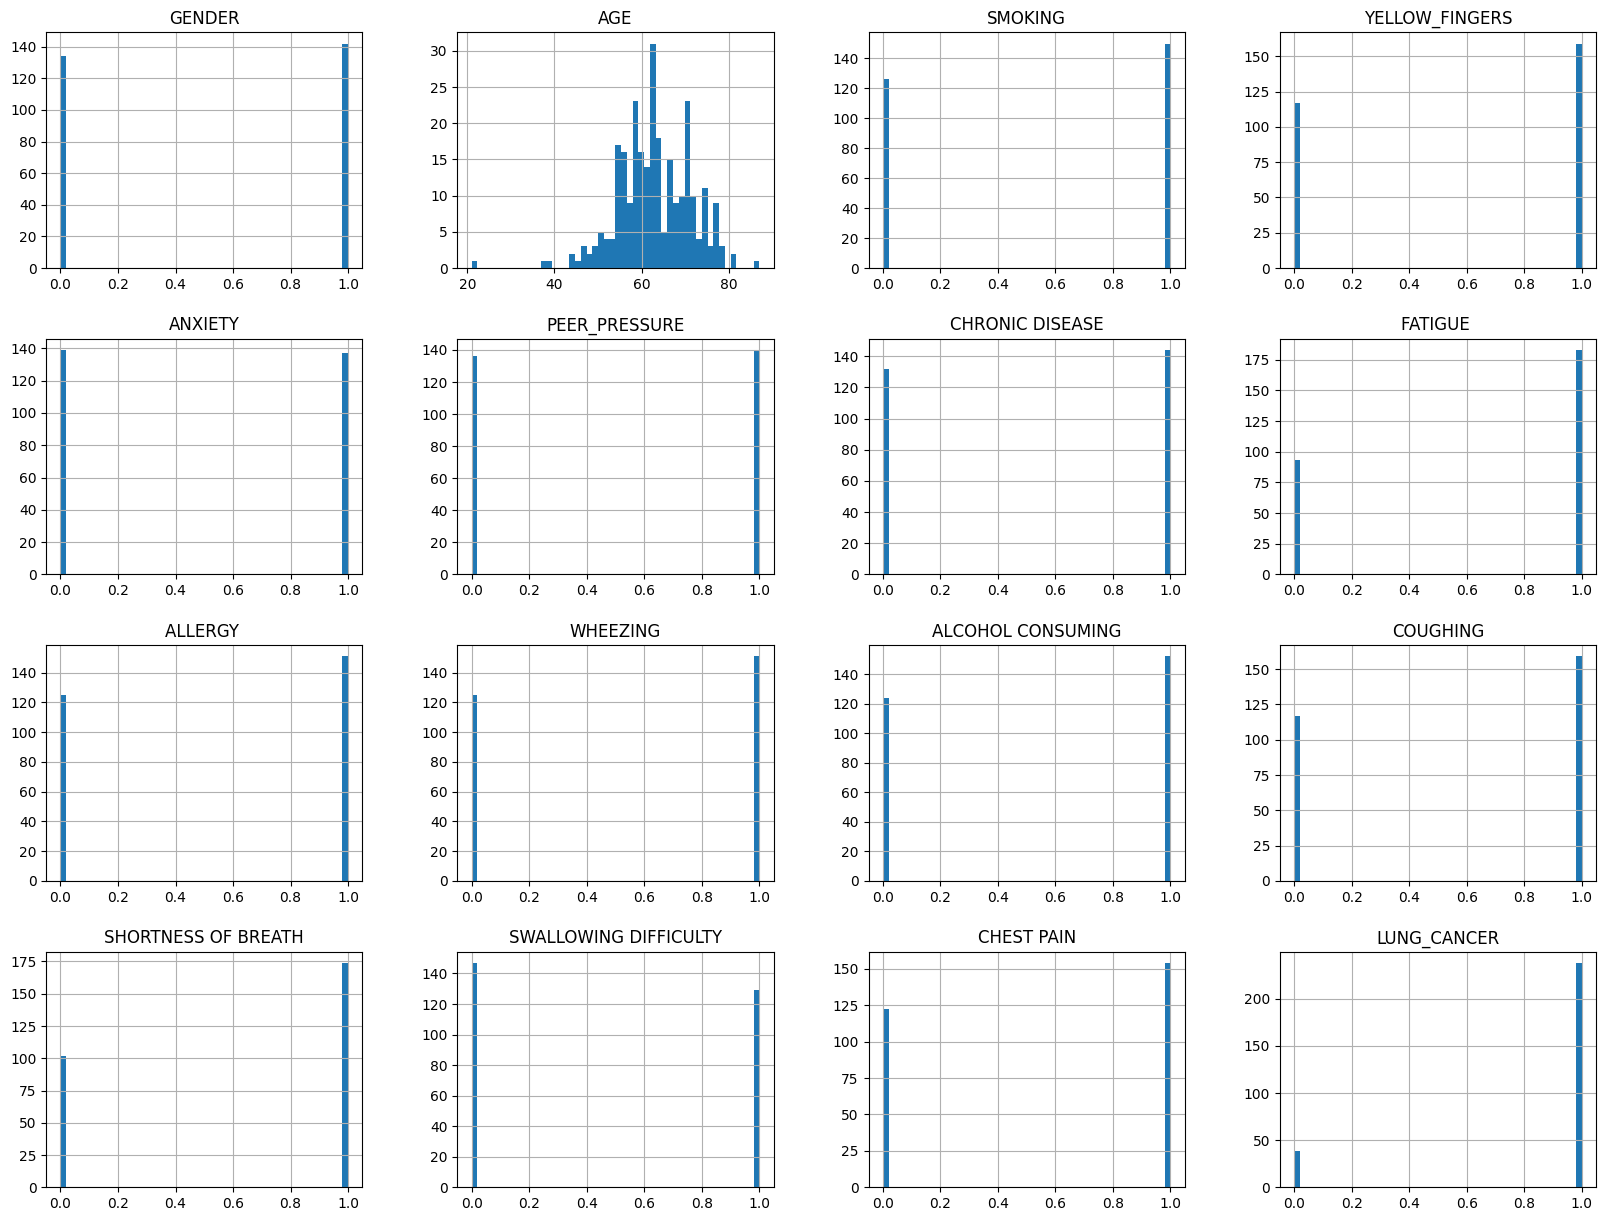

In [13]:
dataset.hist(bins=50, figsize=(20,15))

In [14]:
#Finding Correlation
cn=dataset.corr()
cn

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.013120,0.041131,-0.202506,-0.152032,-0.261427,-0.189925,-0.079020,0.150174,0.121047,0.434264,0.120228,-0.052893,-0.048959,0.361547,0.053666
AGE,-0.013120,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806,0.106305
SMOKING,0.041131,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.034878
YELLOW_FINGERS,-0.202506,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,0.189192
ANXIETY,-0.152032,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,0.144322
PEER_PRESSURE,-0.261427,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,0.195086
CHRONIC DISEASE,-0.189925,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,0.143692
FATIGUE,-0.079020,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,0.160078
ALLERGY,0.150174,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.333552
WHEEZING,0.121047,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,0.249054


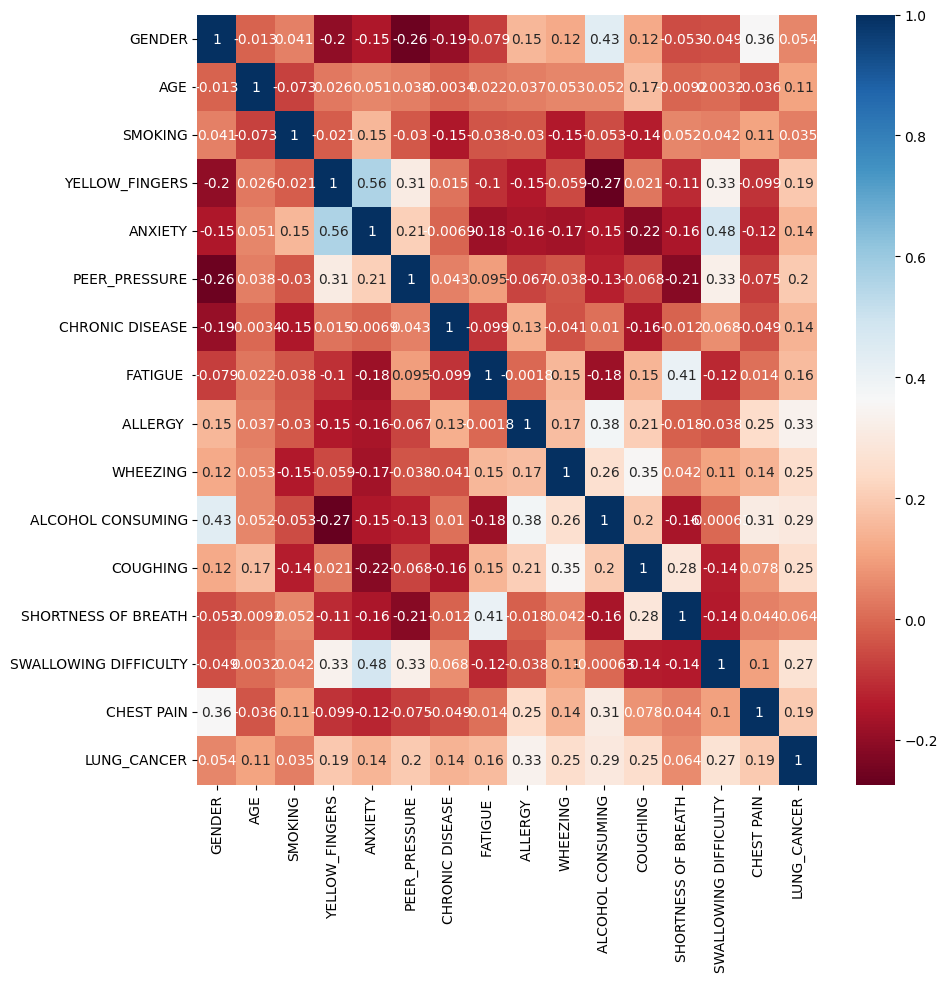

In [15]:
corr = dataset.corr()
features = corr.index
plt.figure(figsize=(10,10))
ax = sns.heatmap(dataset[features].corr(), cmap='RdBu',annot=True)

In [16]:
#Splitting independent and dependent variables
X = dataset.drop('LUNG_CANCER', axis = 1)
y = dataset['LUNG_CANCER']

In [17]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1


In [18]:
y

0      1
1      1
2      0
3      0
4      0
      ..
279    1
280    0
281    0
282    0
283    1
Name: LUNG_CANCER, Length: 276, dtype: int64

In [19]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [20]:
#Data Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [21]:
print(X_train)

[[ 0.89442719 -0.66347221 -1.08579343 ... -1.31289155  1.12903732
  -1.21007674]
 [-1.11803399 -0.27404287  0.9209855  ...  0.76167754 -0.88571031
  -1.21007674]
 [ 0.89442719 -0.53366243  0.9209855  ...  0.76167754 -0.88571031
  -1.21007674]
 ...
 [ 0.89442719  1.80291361  0.9209855  ...  0.76167754  1.12903732
  -1.21007674]
 [-1.11803399  0.11538647  0.9209855  ... -1.31289155  1.12903732
   0.82639387]
 [-1.11803399 -0.53366243  0.9209855  ... -1.31289155  1.12903732
   0.82639387]]


In [22]:
print(X_test)

[[ 0.89442719 -1.05290155  0.9209855  ... -1.31289155 -0.88571031
  -1.21007674]
 [-1.11803399 -1.96157    -1.08579343 ...  0.76167754  1.12903732
  -1.21007674]
 [ 0.89442719 -1.44233088 -1.08579343 ... -1.31289155  1.12903732
  -1.21007674]
 ...
 [-1.11803399 -0.53366243 -1.08579343 ... -1.31289155  1.12903732
  -1.21007674]
 [-1.11803399  1.67310383 -1.08579343 ...  0.76167754  1.12903732
   0.82639387]
 [-1.11803399  0.89424515  0.9209855  ... -1.31289155  1.12903732
  -1.21007674]]


In [23]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
#Predicting result using training data
X_train_pred= lr_model.predict(X_train)
training_data_accuracy=metrics.accuracy_score(y_train, X_train_pred)
print(training_data_accuracy)

0.9468599033816425


In [25]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [26]:
#Comparing predicted values with the actual values
value=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_lr_pred})
value.head()
sample = value.sample(5)
print(sample)

     Actual Value  Predicted Value
230             1                1
220             1                1
155             1                1
181             1                1
7               1                1


In [27]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.97      0.93      0.95        60

    accuracy                           0.91        69
   macro avg       0.80      0.86      0.82        69
weighted avg       0.92      0.91      0.92        69



In [28]:
#Fitting training data to the model
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=25)  
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=25)

In [29]:
#Predicting result using training data
X_train_pred= dt_model.predict(X_train)
training_data_accuracy=metrics.accuracy_score(y_train, X_train_pred)
print(training_data_accuracy)

0.9951690821256038


In [30]:
#Predicting result using testing data
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [31]:
#Comparing predicted values with the actual values
value=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_dt_pred})
value.head()
sample = value.sample(5)
print(sample)

     Actual Value  Predicted Value
181             1                1
157             0                0
279             1                1
179             1                1
229             1                1


In [32]:
#Model accuracy
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.97      0.95      0.96        60

    accuracy                           0.93        69
   macro avg       0.83      0.86      0.85        69
weighted avg       0.93      0.93      0.93        69



In [33]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
#Predicting result using training data
X_train_pred= knn_model.predict(X_train)
training_data_accuracy=metrics.accuracy_score(y_train, X_train_pred)
print(training_data_accuracy)

0.9130434782608695


In [35]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [36]:
#Comparing predicted values with the actual values
value=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_knn_pred})
value.head()
sample = value.sample(5)
print(sample)

     Actual Value  Predicted Value
181             1                1
103             1                1
5               1                1
20              1                1
220             1                1


In [37]:
#Model accuracy
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.93      0.93      0.93        60

    accuracy                           0.88        69
   macro avg       0.74      0.74      0.74        69
weighted avg       0.88      0.88      0.88        69



In [38]:
#Fitting SVC to the training set  
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [39]:
#Predicting result using training data
X_train_pred= svc_model.predict(X_train)
training_data_accuracy=metrics.accuracy_score(y_train, X_train_pred)
print(training_data_accuracy)

0.9516908212560387


In [40]:
#Predicting result using testing data
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [41]:
#Comparing predicted values with the actual values
value=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_svc_pred})
value.head()
sample = value.sample(5)
print(sample)

     Actual Value  Predicted Value
214             1                1
176             1                1
185             1                1
119             1                1
74              1                1


In [42]:
#Model accuracy
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.95      0.93      0.94        60

    accuracy                           0.90        69
   macro avg       0.77      0.80      0.79        69
weighted avg       0.90      0.90      0.90        69



In [43]:
#Training
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
#Predicting result using training data
X_train_pred= rf_model.predict(X_train)
training_data_accuracy=metrics.accuracy_score(y_train, X_train_pred)
print(training_data_accuracy)

0.9951690821256038


In [45]:
#Predicting result using testing data
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [46]:
#Comparing predicted values with the actual values
value=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_rf_pred})
value.head()
sample = value.sample(5)
print(sample)

     Actual Value  Predicted Value
192             1                1
269             1                1
37              0                1
108             1                1
208             1                1


In [47]:
#Model accuracy
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.97      0.95      0.96        60

    accuracy                           0.93        69
   macro avg       0.83      0.86      0.85        69
weighted avg       0.93      0.93      0.93        69



In [48]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)

print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))

Logistic regression models' average accuracy: 0.9130952380952382
Decision tree models' average accuracy: 0.8876984126984127
KNN models' average accuracy: 0.8587301587301587
Support Vector Classifier models' average accuracy: 0.8625661375661376
Random forest models' average accuracy: 0.8982804232804232


# Take Input

In [63]:
from sklearn.preprocessing import LabelEncoder

# Define the input data as a tuple
input_data = ('F',63,1,2,1,1,1,1,1,2,1,2,2,1,1)

# Convert the first element to a numerical value using LabelEncoder
encoder = LabelEncoder()
encoder.fit(['M', 'F'])
input_data = list(input_data)
input_data[0] = encoder.transform([input_data[0]])[0]

# Replace 1's with 0's and 2's with 1's
input_data[2:] = np.where(np.asarray(input_data[2:]) == 1, 0, 1)

# Print the result
print(input_data)

[0, 63, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]


In [64]:
# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#Standardize the data
std_data=scaler.transform(input_data_reshaped)

print(std_data)
prediction=lr_model.predict(std_data)
print(prediction)

[[-1.11803399 -0.01442331 -1.08579343  0.84305623 -0.97613021 -0.96673649
  -0.99518069 -1.35484923 -1.10716144  0.87705802 -1.18616051  0.81814109
   0.76167754 -0.88571031 -1.21007674]]
[0]
